# **Trabalho 1 - Reconhecimento de Padrões**
### Implementação Algoritmo Nearest Centroid
##### Renan Henrique Cardoso - 379013

In [11]:
import numpy as np                         # Algumas operações entre arrays optei usar o array do numpy
from scipy import io                       # Utilizado somente a função loadmat para carregar arquivo .mat 
import seaborn as sns                      # Plotagem
import matplotlib.pyplot as plt            # Plotagem
import pandas as pd                        # Utilizado para converter o .mat e trabalhar também com dataframes
pd.options.mode.chained_assignment = None  

### **Upload dos arquivos .mat**

In [12]:
!curl -o ecg_signals.mat --remote-name -H 'Accept: application/vnd.github.v3.raw' --location https://github.com/cardosorrenan/reconhecimentopadroes-ufc/blob/master/datasets/ecg_signals.mat?raw=true
!curl -o noise_signals.mat --remote-name -H 'Accept: application/vnd.github.v3.raw' --location https://github.com/cardosorrenan/reconhecimentopadroes-ufc/blob/master/datasets/noise_signals.mat?raw=true

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   160  100   160    0     0    761      0 --:--:-- --:--:-- --:--:--   761
100   171  100   171    0     0    630      0 --:--:-- --:--:-- --:--:--   630
100  188k  100  188k    0     0   545k      0 --:--:-- --:--:-- --:--:-- 9177k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   162  100   162    0     0    593      0 --:--:-- --:--:-- --:--:--   593
100   173  100   173    0     0    412      0 --:--:-- --:--:-- --:--:--   412
100  188k  100  188k    0     0   375k      0 --:--:-- --:--:-- --:--:--  375k


### **Plot exemplo de sinal ECG**

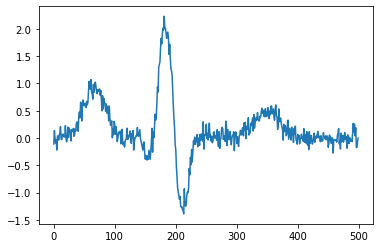

In [13]:
ecgs = io.loadmat('ecg_signals.mat')['Classe1']  # Carrega para 'ecgs' o arquivo ecgSignals.mat
ecgs = pd.DataFrame(ecgs)                    # Transforma do formato dicionário para dataframe
sns.lineplot(data=ecgs[49])                  # Exibe o sinal exemplo 50

### **Plot exemplo de sinal de ruído**

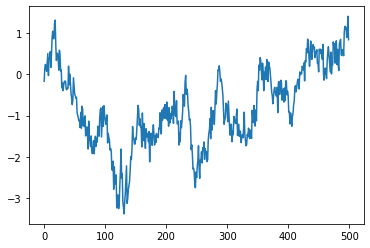

In [14]:
noises = io.loadmat('noise_signals.mat')['Classe2']  
noises = pd.DataFrame(noises)                 
sns.lineplot(data=noises[13])                  

### **Características dos sinais elegidas**:
  - **Média**
  - **Mediana**
  - **Variância**
  - **Curtose** (Kurtosis): Medida de forma que caracteriza o achatamento da curva da função de distribuição de probabilidade
  - **Assimetria** (Skewness): Medida da assimetria da distribuição de probabilidade de uma variável aleatória com valor real sobre sua média

### **Definindo vetor de características para os sinais de ECG**

In [15]:
ecg_vector = pd.DataFrame()                           # Instancia um novo DataFrame
ecg_vector['mean'] = ecgs.mean()                      # Calcula a média de cada sinal ecg
ecg_vector['median'] = ecgs.median()                  # Calcula a mediana de cada sinal ecg
ecg_vector['variance'] = ecgs.var()                   # Calcula a variância de cada sinal ecg
ecg_vector['kurtosis'] = ecgs.kurtosis()              # Calcula a curtose de cada sinal ecg
ecg_vector['skewness'] = ecgs.skew()                  # Calcula a assimetria de cada sinal ecg
ecg_vector['class_kind'] = np.zeros(ecg_vector.shape[0])   # Definindo a classe dos sinais ecg: 0
print('ecg_vector', ecg_vector.shape)                 # Exibe dimensão do dataframe
ecg_vector.head()                                     # Exibe 5 amostras de sinais ecg

ecg_vector (50, 6)


,mean,median,variance,kurtosis,skewness,class_kind
0,0.054555,0.029564,0.044934,7.342880,0.712121,0.0
1,0.219775,0.121604,0.772401,7.525372,0.524423,0.0
2,0.006182,0.003271,0.000600,7.949215,0.598263,0.0
3,0.175649,0.092538,0.429686,7.802710,0.710876,0.0
4,0.249563,0.147590,0.927059,7.554545,0.695768,0.0


### **Definindo vetor de características para os sinais de ruído**

In [16]:
noise_vector = pd.DataFrame()
noise_vector['mean'] = noises.mean()
noise_vector['median'] = noises.median()
noise_vector['variance'] = noises.var()
noise_vector['kurtosis'] = noises.kurtosis()
noise_vector['skewness'] = noises.skew()
noise_vector['class_kind'] = np.ones(noise_vector.shape[0])
print('noise_vector', noise_vector.shape)
noise_vector.head()

noise_vector (50, 6)


,mean,median,variance,kurtosis,skewness,class_kind
0,0.002110,0.003533,0.000173,-1.013604,-0.308855,1.0
1,0.087184,0.171650,0.300552,-0.987618,-0.332647,1.0
2,0.154969,0.307802,1.159563,-0.964448,-0.344421,1.0
3,0.043552,0.089607,0.093389,-0.975847,-0.357878,1.0
4,0.026380,0.055927,0.027955,-0.976322,-0.330218,1.0


### **Definindo dataset**

In [17]:
dataset = ecg_vector.append(noise_vector) # Concatena os dois vetores das classes
dataset = dataset.sample(frac=1)          # Embaralha as linhas
dataset = dataset.reset_index(drop=True)  # Reset dos índices criados nas células anteriores
print('dataset', dataset.shape)
dataset.head(5)                           # Exibe as 5 primeiras amostras do nosso dataset

dataset (100, 6)


,mean,median,variance,kurtosis,skewness,class_kind
0,-0.245991,-0.273452,0.084851,-0.417380,-0.107376,1.0
1,0.195309,0.102002,0.527153,7.197189,0.571494,0.0
2,-0.803239,-0.907022,0.932540,-0.448652,-0.129143,1.0
3,0.115253,0.056159,0.212030,7.444212,0.735188,0.0
4,-0.120439,-0.132988,0.019767,-0.423563,-0.143834,1.0


# **Algoritmo Nearest Centroid**

### **Variáveis de configuração do algoritmo**

In [18]:
n_neighbours = 5   # Quantidade de vizinhos mais próximos que o algoritmo levará em consideração
n_fold = 10        # Quantidade de partes que o dataset será dividido (cross-validation)

### **Rotulação dos sinais (delimitação dos folds)**

In [19]:
dataset['fold'] = pd.DataFrame(data=[-1]*dataset.shape[0])  # Todas as linhas da coluna 'fold' recebe -1, pois ainda não pertencem a nenhum fold
for fold in list(range(0, dataset.shape[0], n_fold)):       # Como K=10, cada linha pertencerá a um fold [0, 1, ..., 9] 
  dataset.loc[fold:fold+n_fold, 'fold'] = fold/n_fold       # 0-10 será 0-Fold / 10-20 será 1-Fold / ... / 90-100 será 9-Fold

### **Funções construídas**

In [20]:
#  Função que calcula a distância euclidiana entre dois pontos
def getEuclidianDistance(point_a, point_b):
  d2_mean = pow(point_a['mean'] - point_b['mean'], 2)
  d2_median = pow(point_a['median'] - point_b['median'], 2)
  d2_variance = pow(point_a['variance'] - point_b['variance'], 2)
  d2_kurtosis = pow(point_a['kurtosis'] - point_b['kurtosis'], 2)
  d2_skewness = pow(point_a['skewness'] - point_b['skewness'], 2)
  sum = d2_mean + d2_median + d2_variance + d2_kurtosis + d2_skewness
  return round(pow(sum,1/2), 6)


#  Obtém as coordenadas de cada centróide
def getCentroids(training_data):
  # Centroid 0
  signals_class0 = training_data.query('class_kind == 0')
  signals_class0 = signals_class0.drop(['class_kind', 'fold'], axis=1)
  n_signals0 = signals_class0.shape[0]
  centroid_0 = signals_class0.sum()/n_signals0
  centroid_0 = centroid_0.to_frame(name='centroid_0').T
  # Centroid 1
  signals_class1 = training_data.query('class_kind == 1')
  signals_class1 = signals_class1.drop(['class_kind', 'fold'], axis=1)
  n_signals1 = signals_class1.shape[0]
  centroid_1 = signals_class1.sum()/n_signals1
  centroid_1 = centroid_1.to_frame(name='centroid_1').T
  return centroid_0.append(centroid_1)


#  Retorna as distâncias entre os pontos de teste e os centróides
def getDistanceFromCentroids(testing_data, centroids):
  testing_data = testing_data.drop(['class_kind', 'fold'], axis=1)
  distances_df = pd.DataFrame()
  for index1, point_test in testing_data.iterrows():
    distances_column = pd.DataFrame()
    for index2, point_centroid in centroids.iterrows():
      distance = getEuclidianDistance(point_test, point_centroid)
      distance_row = pd.DataFrame({ f'{index1}': distance}, [f'{index2}'])
      distances_column = distances_column.append(distance_row)
    distances_df = pd.concat([distances_df, distances_column], axis=1)
  return distances_df


#  Retorna o centróide mais perto de cada ponto de teste
def getPredictedClass(row):
  near_centroid = row.idxmin()
  return 0 if near_centroid == 'centroid_0' else 1


#  Compara dois arrays e retorna a porcentagem de acertos
def compare(x, y):
  truth_array = np.equal(np.array(x), np.array(y))
  return np.sum(truth_array)/len(truth_array) * 100

### **Loop principal**

In [21]:
%%time
acc_total = 0

for validation in list(range(0, n_fold)):
  training_data = dataset.query(f'fold != {validation}')           # Total de 90 amostras em cada rodada do cross-validation
  testing_data = dataset.query(f'fold == {validation}')            # Total de 10 amostras em cada rodada do cross-validation
  centroids = getCentroids(training_data)                          # Obtém os centróides (Marcado com X Azul no plot)                 
  distances_df = getDistanceFromCentroids(testing_data, centroids) # Calcula as distâncias
  predict_classes = distances_df.apply(getPredictedClass)          # Obtém vetor de classes julgando pelo centróide mais perto
  predict_classes = predict_classes.rename('class_kind')           
  accuracy = compare(predict_classes, testing_data['class_kind'])  # Compara com as classes que realmente elas pertencem e retorna a acurácia
  acc_total += accuracy
  print(f'{validation}-Fold: Accuracy {accuracy}%')

print(f'\nAccuracy Total: {acc_total/n_fold} %')

0-Fold: Accuracy 100.0%
1-Fold: Accuracy 100.0%
2-Fold: Accuracy 100.0%
3-Fold: Accuracy 100.0%
4-Fold: Accuracy 100.0%
5-Fold: Accuracy 100.0%
6-Fold: Accuracy 100.0%
7-Fold: Accuracy 100.0%
8-Fold: Accuracy 100.0%
9-Fold: Accuracy 100.0%

Accuracy Total: 100.0 %
CPU times: user 644 ms, sys: 30.5 ms, total: 674 ms
Wall time: 659 ms


# **Alguns insights do algoritmo** (resultados da última validação)

In [22]:
dataset.head()

,mean,median,variance,kurtosis,skewness,class_kind,fold
0,-0.245991,-0.273452,0.084851,-0.417380,-0.107376,1.0,0.0
1,0.195309,0.102002,0.527153,7.197189,0.571494,0.0,0.0
2,-0.803239,-0.907022,0.932540,-0.448652,-0.129143,1.0,0.0
3,0.115253,0.056159,0.212030,7.444212,0.735188,0.0,0.0
4,-0.120439,-0.132988,0.019767,-0.423563,-0.143834,1.0,0.0


In [23]:
centroids.head()

,mean,median,variance,kurtosis,skewness
centroid_0,0.160279,0.075173,0.409165,6.232915,0.746452
centroid_1,-0.188185,-0.135329,1.136592,-0.680995,-0.210340


In [24]:
distances_df.head()

,90,91,92,93,94,95,96,97,98,99
centroid_0,0.531534,0.509689,2.234263,1.311980,7.516057,0.717633,6.868306,2.087194,1.570504,0.985841
centroid_1,7.551091,7.316532,4.910922,8.286408,0.959832,6.340182,0.816329,5.062024,8.573558,7.971565


In [25]:
predict_classes

90    0
91    0
92    0
93    0
94    1
95    0
96    1
97    0
98    0
99    0
Name: class_kind, dtype: int64

### **Substituindo as classes do dataset original pelas preditas para plotagem do gráfico**

In [26]:
testing_data = testing_data.drop(['class_kind'], axis=1)
testing_data['class_kind'] = predict_classes.values

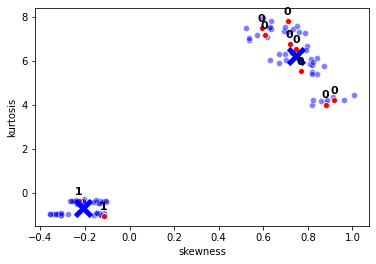

In [27]:
sns.scatterplot(x=training_data['skewness'], y=training_data['kurtosis'], color='blue', alpha=0.5)
ax = sns.scatterplot('skewness', 'kurtosis', data=testing_data, color='red')

plt.xlabel('skewness')
plt.ylabel('kurtosis')

def label_point(x, y, val, ax):
  a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
  for i, point in a.iterrows():
    ax.text(point['x']-0.02, point['y']+0.3, str(int(point['val'])), fontSize=11, fontWeight='extra bold')

label_point(testing_data['skewness'], testing_data['kurtosis'], testing_data['class_kind'], plt.gca())
sns.scatterplot(x=centroids['skewness'], y=centroids['kurtosis'], s=250, color='blue', marker='x', linewidth=5)